# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [23]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()
Pkg.add("Distributions")

  Activating project at `c:\Users\26410\Desktop\Environment A\hw2-bbk`
    Updating registry at `C:\Users\26410\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\26410\Desktop\Environment A\hw2-bbk\Project.toml`
  [31c24e10] + Distributions v0.25.111
    Updating `C:\Users\26410\Desktop\Environment A\hw2-bbk\Manifest.toml`
  [66dad0bd] + AliasTables v1.1.3
  [31c24e10] + Distributions v0.25.111
  [1a297f60] + FillArrays v1.13.0
  [34004b35] + HypergeometricFunctions v0.3.24
  [90014a1f] + PDMats v0.11.31
  [43287f4e] + PtrArrays v1.2.1
  [1fd47b50] + QuadGK v2.11.0
⌅ [79098fc4] + Rmath v0.7.1
⌃ [4c63d2b9] + StatsFuns v1.3.1
⌅ [f50d1b31] + Rmath_jll v0.4.3+0
  [4607b0f0] + SuiteSparse
        Info Packages marked with ⌃ and ⌅ have new versions available. Those with ⌃ may be upgradable, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated -m`
Precompiling project...
  ✓ Rmath_jll
  ✓ QuadGK
  

In [2]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="C:\Users\26410\Desktop\Environment A\hw2-bbk\figures\river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

Define model： 

X: distance downriver<br>
$C_{river}$ : The concentration of CRUD<br> 
$C_{0}$ : The concentration of CRUD at the beginning<br> 
$C_{1}$ : The concentration of CRUD of wastewater at the first time<br> 
$C_{2}$ : The concentration of CRUD of wastewater at the second time<br> 

$C_{0}$ = 0.5 kg/1000$m^3$<br>
$C_{1}$ =(250 $\times$ 0.5 + 40 $\times$ 9) / (40 + 250)<br>
for 0 $\lt$ x $\lt$ 15<br>
$C_{river}$ = $C_{1}$ $0.36^{x/10} $


$C_{2}$ =(290 $\times$ $C_{river}$ + 60 $\times$ 7) / (60 + 290)<br>
for x $\gt$ 15<br>
$C_{river}$ = $C_{2}$ $0.36^{x/10} $

In [45]:
Q_0 = 250000.0  # river inflow in the beginning
C_0 = 0.5       # the concentration of CRUD at the beginning
Q_1w = 40000.0  # wastewater inflow at 1
C_1w = 9.0      # the concentration of CRUD at 1

Q_2w = 60000.0  # wastewater inflow at 2
C_2w = 7.0      # the concentration of CRUD at 2

# get C_1
C_1 = (Q_0 * C_0 + Q_1w * C_1w) / (Q_0 + Q_1w)
Q_1 = Q_0 + Q_1w  # total1

x = 15
# 0<x<15
C_river = C_1 * (0.36^(x / 10))

# get C_2
C_2 = (Q_total1 * C_river + Q_2w * C_2w ) / (Q_1 + Q_2w)
Q_2 = Q_1 + Q_2w  # total2
println(C_1)
println(C_river)
println(C_2)
# Determine
regulatory_limit = 2.5  # kg/1000 m^3
if C_2 <= regulatory_limit
    println("system is in compliance")
else
    println("system is not in  compliance")
end


1.6724137931034482
0.3612413793103448
1.4993142857142858
system is in compliance


> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

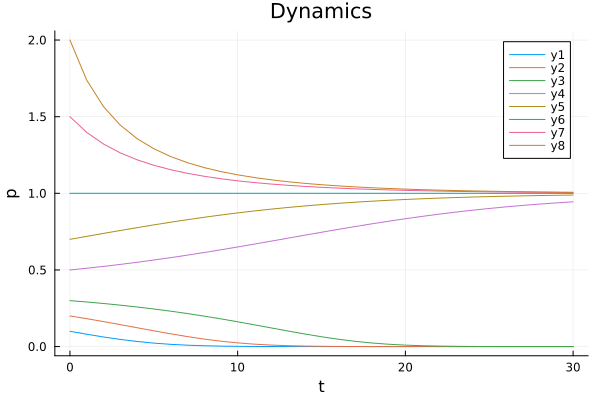

In [52]:
# input
b = 0.5
q = 1.5
y_t = 0
a_t = 0
range = 30  # t as 0-30
# transform from x to x+1
function tran(X, a_t, y_t, b, q)
    return X + a_t + y_t + X^q / (1 + X^q) - b * X
end
x0_set = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0]  #define different x0
Xt = zeros(range + 1) # define 0-group 
plot(xlabel="t", ylabel="p", title="Dynamics")

for X0 in x0_set
    Xt[1] = X0  # input x0
    
    for t in 1:t_max
        Xt[t + 1] = lake_model(Xt[t], a_t, y_t, b, q) # simulate
    end
    plot!(0:range, Xt)  
end

plot!()



In [57]:
function X_recycling(X, q)
    return X^q / (1 + X^q)
end

function X_outflow(X, b)
    return b * X
end

function X_delta(X, a, b, q)
    return a + X_recycling(X, q) - X_outflow(X, b)
end
# Roots.jl 
X_e1 = find_zero(x -> X_delta(x, a_t, b, q), 0.8)  # x0=0.8
println(X_e1)

1.0


The system demonstrates strong resilience around the equilibrium, from 0.5 to 2.0, all of them can recover to 1.

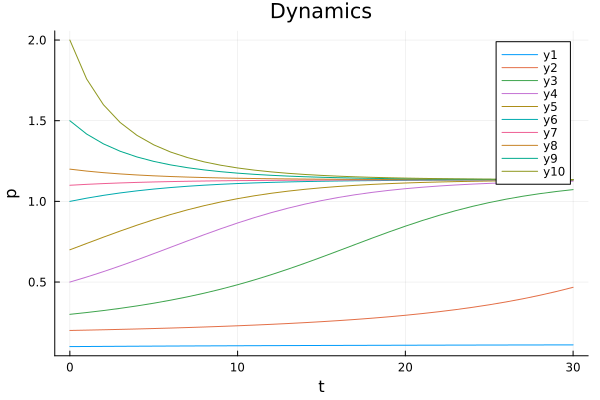

In [61]:
# a_t = 0.02
a_t = 0.02
x0_set = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.1, 1.2, 1.5, 2.0]  #define different x0
Xt = zeros(range + 1) # define 0-group 
plot(xlabel="t", ylabel="p", title="Dynamics")

for X0 in x0_set
    Xt[1] = X0  # input x0
    
    for t in 1:t_max
        Xt[t + 1] = lake_model(Xt[t], a_t, y_t, b, q) # simulate
    end
    plot!(0:range, Xt)  
end

plot!()

In [60]:
X_e2 = find_zero(x -> X_delta(x, a_t, b, q), 1.1)
println(X_e2)


1.1341008852434817


It shows the stronger resilience when p<0.5 and the dynamics have slowed down.

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

Consider the lake eutrophication example from [Lecture
04](https://viveks.me/environmental-systems-analysis/slides/lecture03-1-eutrophication-modeling.html#/title-slide).
Suppose that phosphorous is also atmospherically deposited onto the lake
surface at a rate of
$1.6 \times 10^{-4} \mathrm{kg/(yr} \cdot \mathrm{m}^2)$, which is then
instantly mixed into the lake. Derive a model for the lake phosphorous
concentration and find the maximum allowable point source phosphorous
loading if the goal is to keep lake concentrations below 0.02 mg/L.

C : Lake concentrations 


C = ($\sum_j$ $PS_j$ + $\sum_i$ $NPS_i$)/($Q_{out}$ + $\alpha$ V) $\le$ 0.02 mg/L 


$\therefore$   ($\sum_j$ $PS_j$ + $\sum_i$ $NPS_i$) $\le$ (2 $\times$ $10^{-5}$) $\times$ ($Q_{out}$ + $\alpha$ V)


(2 $\times$ $10^{-5}$) $\times$ ($Q_{out}$ + $\alpha$ V) = 14000 kg/yr


$\sum_i$ $NPS_i$ = 1.6 $\times$ $10^{-4}$ $\times$ A = 4800 kg/yr


$\therefore$   max of $\sum_j$ $PS_j$ = 9200 kg/yr

## References

List any external references consulted, including classmates.